### Normal equation

In [1]:
# imports
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from typing import Dict, Iterator, List, Tuple, Union


In [2]:
# Generating the data

X = 2 * np.random.rand(100, 1)
#a , theta_0 = 3, 4
y =  4 + 3 * X + np.random.randn(100, 1)
X.shape, y.shape

((100, 1), (100, 1))

In [3]:
def plot_two_dict(array_1  : Dict[str, np.ndarray], array_2: Dict[str, np.ndarray])-> None:
    plt.scatter(array_1['values'], array_2['values'])
    plt.show()
    

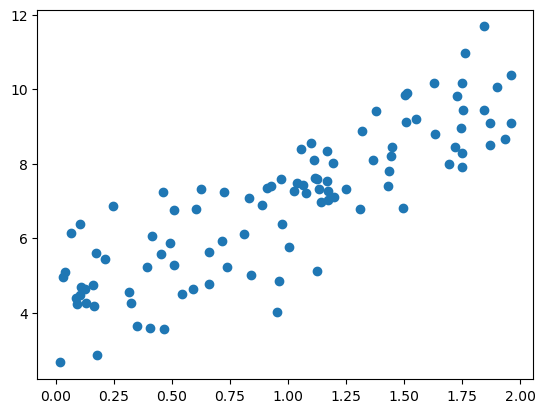

In [4]:
data = {"label":"Training Data", "values": X}
labels = {"label": "Training labels", "values": y}
plot_two_dict(data, labels)

In [5]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot((X_b))).dot(X_b.T).dot(y)
print(X.shape, X_b.shape, theta_best)

(100, 1) (100, 2) [[4.12220535]
 [2.89012027]]


In [6]:
theta_best.shape


(2, 1)

In [7]:
## predictions
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict


array([[4.12220535],
       [9.90244589]])

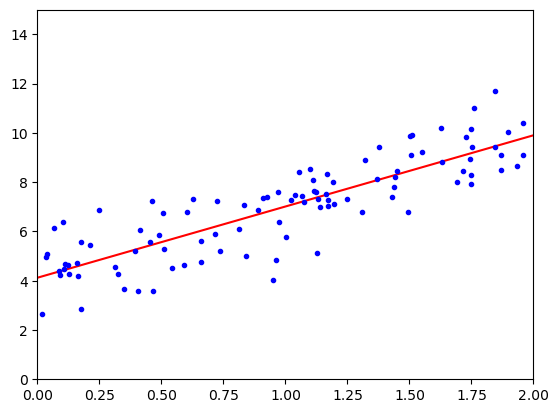

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.12220535]), array([[2.89012027]]))

In [10]:
### prediction using linear regression model
lin_reg.predict(X_new)

array([[4.12220535],
       [9.90244589]])

In [11]:
## computing the pseudo inverse of the model parameters
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [12]:
# Theta, residuals , rank and s
theta_best_svd, residuals, rank, s

(array([[4.12220535],
        [2.89012027]]),
 array([104.44836693]),
 np.int32(2),
 array([14.56880433,  3.97321877]))

### Gradient descent

In [13]:
## gradient descent
eta = 0.1
n_iterations = 1000
m = 400
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta)- y)
    theta = theta - eta * gradients
theta

array([[4.12159465],
       [2.89064924]])

In [14]:
gradients


array([[-4.85877551e-05],
       [ 4.20847243e-05]])

### Stochastic Gradient descendt

In [15]:
n_epochs = 50
t0, t1 = 5, 50 # learning rates schedule params
theta = np.random.randn(2,1)

In [16]:
def schedule_learning_rate(t: float)->float:
    return t0 / (t + t1)

In [17]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        Xi = X_b[random_index: random_index+1]
        yi = y[random_index: random_index+1]
        gradients = 2 * Xi.T.dot(Xi.dot(theta) -yi)
        eta = schedule_learning_rate(epoch * m + i)
        theta = theta - eta * gradients

In [18]:
theta

array([[4.18601454],
       [2.87136389]])

#### using scikit-leran SGD model.

In [19]:
from sklearn.linear_model import SGDRegressor

In [20]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)

In [24]:
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [25]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.05486696]), array([2.83219716]))